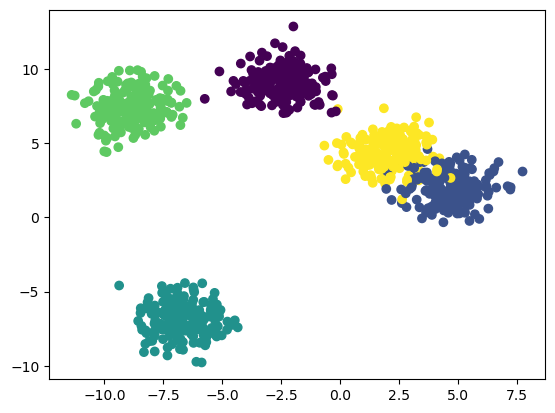

In [239]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

# Generate 300 samples with 3 clusters
X, y = make_blobs(n_samples=1000, centers=5, random_state=42)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.show()

In [126]:
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate sample data
X, y = make_blobs(n_samples=1000, centers=5, cluster_std=1.0, random_state=42)

# Define sample weights (arbitrary for this example)
#sample_weights = np.random.rand(len(X))  # Random weights between 0 and 1
sample_weights = np.ones(len(X), dtype=int)
train_data = pd.concat((pd.DataFrame(X), pd.DataFrame(sample_weights)), axis=1)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

In [116]:
train_data

,0,1,0
0,-9.255593,7.240112,1
1,-5.150326,-8.371190,1
2,4.182246,2.158858,1
3,4.998223,0.776612,1
4,-7.096944,10.166117,1
...,...,...,...
9995,-8.975493,8.110797,1
9996,-2.342745,9.506737,1
9997,2.531802,3.120984,1
9998,5.677060,1.062683,1


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons

# Generate dataset
X, _ = make_moons(n_samples=3000000, noise=0.1, random_state=42)
# Predict for new sample points
new_points = np.array([[0.5, 0.5], [1.0, -0.5], [-0.5, 0.8]])  # Example new data points

New point labels: [1 0 1]


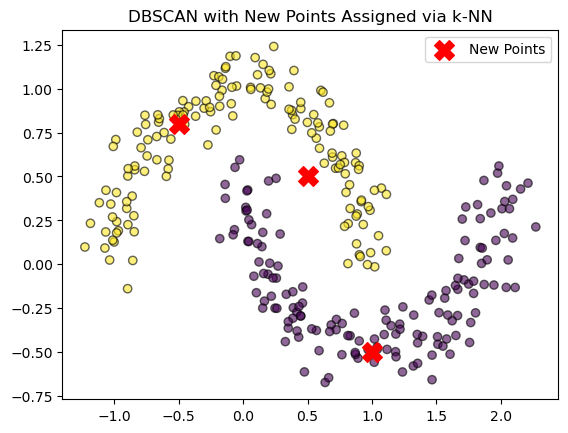

In [8]:

# Fit DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Extract core sample indices (to use as training data for k-NN)
core_samples_mask = dbscan.core_sample_indices_
core_points = X[core_samples_mask]
core_labels = labels[core_samples_mask]

# Train k-NN classifier on DBSCAN core points
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(core_points, core_labels)

new_labels = knn.predict(new_points)

print(f"New point labels: {new_labels}")

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", edgecolors="k", alpha=0.6)
plt.scatter(new_points[:, 0], new_points[:, 1], c="red", marker="X", s=200, label="New Points")
plt.legend()
plt.title("DBSCAN with New Points Assigned via k-NN")
plt.show()

In [2]:
new_points

array([[ 0.5,  0.5],
       [ 1. , -0.5],
       [-0.5,  0.8]])

In [3]:
new_labels

array([1, 0, 1], dtype=int64)

In [15]:
from sklearn.metrics import pairwise_distances_argmin

def assign_new_points(dbscan, X_train, X_new):
    core_samples = X_train[dbscan.core_sample_indices_]
    core_labels = dbscan.labels_[dbscan.core_sample_indices_]
    
    nearest_core_sample = pairwise_distances_argmin(X_new, core_samples)
    return core_labels[nearest_core_sample]

new_labels = assign_new_points(dbscan, X, new_points)
print(f"New Labels: {new_labels}")

New Labels: [1 1 0]


In [141]:
from sklearn.utils import resample

def bootstrap_stability(train_data, k=3, runs=10, sample_size=0.1):
    data = train_data.sample(frac=sample_size)
    
    scores = []
    for _ in range(runs):
        data_sample = resample(data, n_samples=len(data), replace=True)
        X_sample = data_sample.iloc[:, :-1]
        weights_sample = data_sample.iloc[:, -1]
        kmeans = KMeans(n_clusters=k, random_state=None, n_init=10).fit(X_sample, sample_weight=weights_sample)
#        scores.append(kmeans.inertia_ / len(X_sample))
        scores.append(sum(weights_sample.values[i] * np.linalg.norm(X_sample.values[i] - kmeans.cluster_centers_[kmeans.labels_[i]])**2 for i in range(len(X_sample))) / len(X_sample))
   
    return np.std(scores)

stability = bootstrap_stability(train_data=train_data, k=3, runs=10, sample_size=1)
print(f"Bootstrap Stability Score (Lower is Better): {stability}")


Bootstrap Stability Score (Lower is Better): 0.09785039481078327


In [73]:
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [74]:
kmeans.labels_[0]

1

In [70]:
X

array([[ 5.02007669,  2.58375543],
       [ 3.23236714,  1.195353  ],
       [-6.10792848, -9.72865221],
       ...,
       [-9.44783996,  7.13655161],
       [ 4.60489035,  3.74397032],
       [-7.81426523,  7.91604986]])

In [71]:
sample_weights

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [65]:
np.linalg.norm(X[0] - kmeans.cluster_centers_[kmeans.labels_[0]])**2

3.302759165126775

In [58]:
# Compute Weighted WCSS
wcss_weighted = round(sum(sample_weights[i] * np.linalg.norm(X[i] - kmeans.cluster_centers_[labels[i]])**2 for i in range(len(X))) / np.sum(sample_weights), 10)

print(f"Weighted WCSS: {wcss_weighted}")

Weighted WCSS: 7.3808440966


In [59]:
round(kmeans.score(X) * -1 / len(labels), 10)

7.3808440966

In [39]:
kmeans.inertia_

7380.844096563572

1000

In [3]:
#Gemini 
import numpy as np
import time
from sklearn.metrics import adjusted_rand_score

def weighted_adjusted_rand_index_gemini(labels_true, labels_pred, sample_weights):
    """
    Calculates the weighted Adjusted Rand Index (ARI) for a given dataset and its cluster assignments.

    Args:
        labels_true: Ground truth labels for each data point.
        labels_pred: Predicted cluster assignments for each data point.
        sample_weights: An array of weights for each data point.

    Returns:
        The weighted Adjusted Rand Index.
    """

    n_samples = len(labels_true)

    # Create contingency matrix
    contingency_matrix = np.zeros((len(np.unique(labels_true)), len(np.unique(labels_pred))))
    for i in range(n_samples):
        contingency_matrix[labels_true[i], labels_pred[i]] += sample_weights[i]

    # Calculate weighted a, b, c, d 
    a = np.sum(np.sum(contingency_matrix * (contingency_matrix - 1), axis=1) / 2)
    b = np.sum(np.sum(contingency_matrix * np.sum(contingency_matrix, axis=1)[:, np.newaxis], axis=1) - a)
    c = np.sum(np.sum(contingency_matrix * np.sum(contingency_matrix, axis=0), axis=0) - a)
    d = np.sum(sample_weights)**2 - a - b - c - a

    # Calculate expected_a, expected_b, expected_c, expected_d
    expected_a = (a + b) * (a + c) / np.sum(sample_weights)**2
    expected_b = (b * (d + c)) / np.sum(sample_weights)**2
    expected_c = (c * (d + b)) / np.sum(sample_weights)**2
    expected_d = (d * (c + b)) / np.sum(sample_weights)**2

    # Calculate adjusted_rand_index
    weighted_ari = (a - expected_a) / ((a + b) * (a + c) + (b + d) * (c + d))

    return weighted_ari

# Example Usage:
#from sklearn.datasets import make_blobs
#from sklearn.cluster import KMeans

#X, y_true = make_blobs(n_samples=100, centers=3, random_state=42)
#sample_weights = np.random.rand(100)  # Sample weights

#kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
#y_pred = kmeans.labels_

start_time = time.time()
weighted_ari_gemini = weighted_adjusted_rand_index_gemini(y, labels, sample_weights)
print("Weighted Adjusted Rand Index Gemini:", weighted_ari_gemini)
print('Weighted Adjusted Rand Index Gemini took %.2fs. to run'%(time.time() - start_time))

start_time = time.time()
ari_sklearn = adjusted_rand_score(y, labels)
print("Weighted Adjusted Rand Index sklearn:", ari_sklearn)
print('Weighted Adjusted Rand Index sklearn took %.2fs. to run'%(time.time() - start_time))

Weighted Adjusted Rand Index Gemini: 1.6796405492963827e-07
Weighted Adjusted Rand Index Gemini took 0.00s. to run
Weighted Adjusted Rand Index sklearn: 0.6106027214929445
Weighted Adjusted Rand Index sklearn took 0.01s. to run


In [33]:
import numpy as np
from sklearn.metrics.cluster import contingency_matrix

def weighted_contingency_matrix(labels_true, labels_pred, sample_weight=None):
    """
    Compute a weighted contingency matrix.

    Parameters:
        labels_true: Ground truth labels.
        labels_pred: Cluster labels.
        sample_weight: Optional weight for each sample.

    Returns:
        Weighted contingency matrix.
    """
    labels_true = np.array(labels_true)
    labels_pred = np.array(labels_pred)

    # If no sample weights provided, assume equal weight (1 per sample)
    if sample_weight is None:
        sample_weight = np.ones_like(labels_true, dtype=float)

    # Find unique clusters
    unique_true = np.unique(labels_true)
    unique_pred = np.unique(labels_pred)

    # Create an empty contingency matrix
    cont_matrix = np.zeros((len(unique_true), len(unique_pred)))

    # Compute weighted contingency counts
    for i, true_label in enumerate(unique_true):
        for j, pred_label in enumerate(unique_pred):
            mask = (labels_true == true_label) & (labels_pred == pred_label)

            import pdb
            pdb.set_trace()  
            
            cont_matrix[i, j] = np.sum(sample_weight[mask])  # Weighted count

    return cont_matrix


def weighted_adjusted_rand_index_chatgpt(labels_true, labels_pred, sample_weights=None):
    # Convert labels to numpy arrays
    labels_true = np.asarray(labels_true)
    labels_pred = np.asarray(labels_pred)

    n = len(labels_true)
    
    if sample_weights is None:
        sample_weights = np.ones(n)  # Default to equal weights

    # Compute weighted contingency table
    contingency = weighted_contingency_matrix(labels_true, labels_pred, sample_weight=sample_weights)

    # Compute weighted sums for the formula
    sum_comb_c = np.sum(contingency * (contingency - 1)) / 2  # Sum of combinations for clusters
    sum_comb_a = np.sum(np.sum(contingency, axis=1) * (np.sum(contingency, axis=1) - 1)) / 2
    sum_comb_b = np.sum(np.sum(contingency, axis=0) * (np.sum(contingency, axis=0) - 1)) / 2
    w_sum = np.float64(np.sum(sample_weights))
    sum_comb_n = w_sum * (w_sum - 1) / 2  # Total weighted pairs

    expected_index = (sum_comb_a * sum_comb_b) / sum_comb_n  # Expected index
    max_index = (sum_comb_a + sum_comb_b) / 2  # Maximum index

    if max_index == expected_index:
        return 1.0  # Avoid division by zero, perfect match

    weighted_ARI = (sum_comb_c - expected_index) / (max_index - expected_index)
    return weighted_ARI

In [ ]:
# Example Usage:
#true_labels = [0, 0, 1, 1, 2, 2]
#pred_labels = [0, 0, 1, 2, 2, 1]
#weights = [1, 2, 1, 3, 2, 1]  # Sample weights

start_time = time.time()
weighted_ARI_score = weighted_adjusted_rand_index_chatgpt(y, labels, sample_weights=sample_weights)
print("Weighted Adjusted Rand Index:", weighted_ARI_score)
print('Weighted Adjusted Rand Index chatgpt took %.2fs. to run'%(time.time() - start_time))

start_time = time.time()
ari_sklearn = adjusted_rand_score(y, labels)
print("Weighted Adjusted Rand Index sklearn:", ari_sklearn)
print('Weighted Adjusted Rand Index sklearn took %.2fs. to run'%(time.time() - start_time))

In [23]:
type(sample_weights)

numpy.ndarray

In [378]:
w_sum = np.float64(np.sum(sample_weights))
w_sum * (w_sum - 1) / 2

499999500000.0

In [377]:
1000000*(1000000-1)/2

499999500000.0

array([[9.97789320e+03, 0.00000000e+00, 1.83075442e+01],
       [0.00000000e+00, 0.00000000e+00, 1.00172330e+04],
       [0.00000000e+00, 1.00147865e+04, 0.00000000e+00],
       [9.97475367e+03, 0.00000000e+00, 0.00000000e+00],
       [1.46154552e+00, 0.00000000e+00, 9.94916709e+03]])

In [324]:
contingency_matrix(y, labels)

array([[19962,     0,    38],
       [    0,     0, 20000],
       [    0, 20000,     0],
       [20000,     0,     0],
       [    4,     0, 19996]], dtype=int64)

In [325]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y, y_pred=labels, sample_weight=sample_weights)

array([[9.97789320e+03, 0.00000000e+00, 1.83075442e+01, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00172330e+04, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 1.00147865e+04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [9.97475367e+03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.46154552e+00, 0.00000000e+00, 9.94916709e+03, 0.00000000e+00,
        0.00000000e+00]])

In [299]:
pd.DataFrame(y).value_counts()

0
0    2000
1    2000
2    2000
3    2000
4    2000
Name: count, dtype: int64

In [188]:
import numpy as np
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn.utils import resample

# Sample dataset
np.random.seed(42)
X = np.random.rand(100, 5)  # 100 samples, 5 features

# Parameters
n_bootstrap = 10  # Number of bootstrap samples
n_clusters = 3    # Number of clusters
ari_scores = []

# Generate Bootstrap Samples and Compute ARI
for i in range(n_bootstrap):
    for j in range(i + 1, n_bootstrap):
        # Resample data with replacement
        X_sample_1 = resample(X, replace=True, random_state=i)
        X_sample_2 = resample(X, replace=True, random_state=j)

        # Apply clustering (e.g., KMeans)
        kmeans_1 = KMeans(n_clusters=n_clusters, random_state=42, n_init=10).fit(X_sample_1)
        kmeans_2 = KMeans(n_clusters=n_clusters, random_state=42, n_init=10).fit(X_sample_2)

        # Compute ARI between the two cluster assignments
        ari = adjusted_rand_score(kmeans_1.labels_, kmeans_2.labels_)
        ari_scores.append(ari)

# Calculate the average stability score
stability_score = np.mean(ari_scores)
print(f"Clustering Stability Score (ARI): {stability_score:.4f}")

C:\Users\creep\miniconda3\envs\test_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\creep\miniconda3\envs\test_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\creep\miniconda3\envs\test_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\creep\miniconda3\envs\test_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: 

Clustering Stability Score (ARI): -0.0043


C:\Users\creep\miniconda3\envs\test_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\creep\miniconda3\envs\test_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\creep\miniconda3\envs\test_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\creep\miniconda3\envs\test_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: 

In [189]:
len(ari_scores)

45

In [190]:
import math 
n=n_bootstrap
r=2
#math.factorial(n) / n
math.comb(n, r)

45

In [34]:
import pandas as pd
#models_to_test = {'Model': KMeans, 'default_args': {'init': 'k-means++'}, 'test_arg': 'n_clusters', 'test_values': [2,3,4,5,6,7,8]}
models_to_test = {'Model': KMeans, 'default_args': {'init': 'k-means++'}, 'test_arg': 'n_clusters', 'test_values': 5}
model = models_to_test["Model"]
t = models_to_test["test_values"]
model_args = models_to_test["default_args"]
indep_param_nm = models_to_test["test_arg"]
boostraps = 5
sample_size = 0.1

train_data = pd.concat((pd.DataFrame(X), pd.DataFrame(sample_weights)), axis=1)
rng = np.random.RandomState(6)
data = train_data.sample(frac=sample_size)
X1 = data.iloc[:, :-1]
weights = data.iloc[:, -1]
args = model_args
args[indep_param_nm] = t

labels_1 = []
weight = []
indices = []
for i in range(boostraps):
    sample_indices = rng.randint(0, X1.shape[0], X1.shape[0])
    indices.append(sample_indices)
    est = model(**args)
    if hasattr(est, "random_state"): 
        est.random_state = rng.randint(1e5)
    X_bootstrap = X1.iloc[sample_indices]
    weights_bootstrap = weights.iloc[sample_indices]
    est.fit(X_bootstrap, sample_weight = weights_bootstrap)
    relabel = -np.ones(X1.shape[0], dtype=int)
    relabel[sample_indices] = est.labels_
    reweight = -np.ones(X1.shape[0], dtype=float)
    reweight[sample_indices] = sample_weights[sample_indices]
    labels_1.append(relabel)
    weight.append(reweight)
display(labels_1)
display(weight)
display(indices)
scores = []

num=0
for l, i in zip(labels_1, indices):
    num = num+1
    for k, j in zip(labels_1[num:], indices[num:]):
#    for k, j in zip(labels_1, indices):
        in_both = np.intersect1d(i, j)
#        scores.append(adjusted_rand_score(l[in_both], k[in_both]))

#        import pdb
#        pdb.set_trace()  
        
        scores.append(weighted_adjusted_rand_index_chatgpt(labels_true=l[in_both], labels_pred=k[in_both], sample_weights=sample_weights[in_both]))
print(scores)
print(len(scores))
print(np.mean(scores))

C:\Users\creep\miniconda3\envs\test_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\creep\miniconda3\envs\test_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\creep\miniconda3\envs\test_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\creep\miniconda3\envs\test_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: 

[array([-1,  1,  1,  3,  0,  2, -1,  3,  4,  4,  1,  4, -1, -1,  2,  2, -1,
        -1, -1,  0, -1,  2,  0, -1,  3,  1,  1, -1,  3,  3, -1,  4, -1,  3,
        -1,  2,  2, -1, -1, -1,  3,  4,  1,  1, -1, -1, -1,  1,  3,  3,  2,
        -1, -1, -1, -1, -1,  4,  1, -1, -1,  0, -1,  2,  4, -1,  2,  4,  0,
         1,  1,  1, -1, -1,  2, -1,  0,  4,  4,  1,  0,  2, -1,  0, -1,  3,
         4,  0, -1, -1,  3,  4,  1, -1, -1, -1, -1, -1, -1, -1,  0]),
 array([ 3,  0,  0, -1, -1,  3, -1,  1, -1, -1, -1, -1, -1, -1,  3, -1,  3,
         1,  0, -1,  3, -1,  4,  2, -1, -1, -1,  2,  1,  1, -1,  2,  4,  1,
         4,  3, -1,  1, -1,  3,  1,  2,  0, -1,  3,  4,  2, -1,  1, -1,  3,
         0, -1, -1, -1,  2,  2,  0,  1, -1, -1, -1,  3,  2, -1, -1, -1,  4,
        -1,  0,  0,  1,  2,  3,  1, -1,  2,  2,  0,  4,  3, -1,  4, -1, -1,
         2,  4,  0,  4,  1,  2,  0,  2, -1, -1,  4,  2,  2, -1,  4]),
 array([ 3,  1,  1,  0, -1,  3,  4,  0,  2,  2, -1,  2,  4,  4,  3, -1,  3,
        -1, -1, -1,  3, 

[array([-1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1.,
        -1.,  1.,  1., -1., -1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1.,
         1., -1.,  1.,  1., -1.,  1., -1.,  1., -1.,  1.,  1., -1., -1.,
        -1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1., -1.,
        -1., -1., -1., -1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1., -1.,
         1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1.,
         1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1.,  1.,
         1., -1., -1., -1., -1., -1., -1., -1.,  1.]),
 array([ 1.,  1.,  1., -1., -1.,  1., -1.,  1., -1., -1., -1., -1., -1.,
        -1.,  1., -1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1., -1., -1.,
        -1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1.,
         1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1.,
        -1., -1., -1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1., -1.,
        -1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  

[array([10, 73, 99, 84, 79, 80, 62, 25,  1, 75, 77, 57, 26, 33, 68, 33,  8,
         2, 76, 84, 91, 31, 66,  5, 26, 15, 89, 86, 43, 69, 49,  4, 62, 80,
        66, 66, 63, 19, 85, 28, 43, 57,  5, 50, 26, 78, 40, 69, 70, 90, 63,
        10, 67, 85, 11,  1, 82, 35, 22, 41, 24, 48, 42, 67,  7, 36, 75, 56,
        33, 76, 68, 33, 15, 69, 47, 21, 70,  1,  9, 48, 42, 40, 77, 73, 65,
        63, 82, 66, 25, 21, 76, 68, 29, 14, 22,  3, 33, 36, 24, 60]),
 array([74, 58, 20, 82, 70, 28, 50, 69, 34, 91, 28, 76, 55, 46, 92, 78, 85,
        63, 44,  1, 17, 91,  7, 85, 50, 88, 95, 40, 77, 39, 80, 76, 45, 44,
        79, 57, 82, 32, 76, 46, 23, 22, 48, 39, 91, 37, 33, 88, 41, 27, 90,
        22, 51, 95, 71, 71,  5, 67, 72, 79, 39, 99, 42,  5, 57, 99, 96, 23,
        87, 45, 31, 16, 99, 69, 35,  2, 99, 14, 20, 29, 57,  0, 72, 62, 99,
        18, 97, 86, 72, 88, 73, 32, 71, 16, 37, 46, 89, 44, 56, 45]),
 array([73, 60,  1, 65, 25, 25, 37, 91, 86, 84, 74, 16, 68, 98, 54, 95, 66,
        12, 49, 47, 14, 

> c:\users\creep\appdata\local\temp\ipykernel_78712\2377435103.py(38)weighted_contingency_matrix()



ipdb>  len(labels_true)


36


ipdb>  len(mask)


36


ipdb>  len(labels_pred)


36


ipdb>  len(sample_weight)


36


ipdb>  q


In [20]:
#models_to_test = {'Model': KMeans, 'default_args': {'init': 'k-means++'}, 'test_arg': 'n_clusters', 'test_values': [2,3,4,5,6,7,8]}
models_to_test = {'Model': KMeans, 'default_args': {'init': 'k-means++'}, 'test_arg': 'n_clusters', 'test_values': 5}
model = models_to_test["Model"]
t = models_to_test["test_values"]
model_args = models_to_test["default_args"]
indep_param_nm = models_to_test["test_arg"]
boostraps = 5
sample_size = 0.1

train_data = pd.concat((pd.DataFrame(X), pd.DataFrame(sample_weights)), axis=1)
rng = np.random.RandomState(6)
data = train_data.sample(frac=sample_size)
X1 = data.iloc[:, :-1]
weights = data.iloc[:, -1]
args = model_args
args[indep_param_nm] = t

labels = []
indices = []
for i in range(boostraps):
    sample_indices = rng.randint(0, X1.shape[0], X1.shape[0])
    indices.append(sample_indices)
    est = model(**args)
    if hasattr(est, "random_state"): 
        est.random_state = rng.randint(1e5)
    X_bootstrap = X1.iloc[sample_indices]
    weights_bootstrap = weights.iloc[sample_indices]
    est.fit(X_bootstrap, sample_weight = weights_bootstrap)
    relabel = -np.ones(X1.shape[0], dtype=int)
    relabel[sample_indices] = est.labels_
    labels.append(relabel)
display(labels)
display(indices)
scores = []

num=0
for l, i in zip(labels, indices):
    num = num+1
    for k, j in zip(labels[num:], indices[num:]):
#    for k, j in zip(labels, indices):
        in_both = np.intersect1d(i, j)
#        scores.append(adjusted_rand_score(l[in_both], k[in_both]))
        scores.append(weighted_adjusted_rand_index(labels_true=l[in_both], labels_pred=k[in_both], sample_weights=sample_weights[in_both]))
print(scores)
print(len(scores))
print(np.mean(scores))

C:\Users\creep\miniconda3\envs\test_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\creep\miniconda3\envs\test_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\creep\miniconda3\envs\test_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\creep\miniconda3\envs\test_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: 

[array([-1,  0,  0,  4,  0,  0, -1,  0,  1,  3,  2,  1, -1, -1,  3,  1, -1,
        -1, -1,  1, -1,  0,  0, -1,  2,  2,  0, -1,  2,  1, -1,  1, -1,  4,
        -1,  1,  2, -1, -1, -1,  1,  2,  1,  2, -1, -1, -1,  0,  3,  2,  4,
        -1, -1, -1, -1, -1,  1,  1, -1, -1,  0, -1,  1,  3, -1,  0,  0,  1,
         1,  4,  1, -1, -1,  3, -1,  1,  3,  1,  4,  3,  2, -1,  1, -1,  3,
         3,  2, -1, -1,  3,  1,  0, -1, -1, -1, -1, -1, -1, -1,  2]),
 array([ 3,  2,  2, -1, -1,  2, -1,  2, -1, -1, -1, -1, -1, -1,  3, -1,  1,
         0,  4, -1,  0, -1,  2,  1, -1, -1, -1,  4,  1,  0, -1,  4,  0,  1,
         0,  4, -1,  0, -1,  3,  0,  1,  0, -1,  4,  0,  1, -1,  3, -1,  1,
         2, -1, -1, -1,  0,  0,  4,  4, -1, -1, -1,  4,  3, -1, -1, -1,  0,
        -1,  1,  4,  0,  1,  3,  2, -1,  3,  4,  1,  3,  1, -1,  4, -1, -1,
         3,  1,  4,  4,  3,  0,  2,  2, -1, -1,  2,  4,  0, -1,  1]),
 array([ 4,  1,  1,  2, -1,  1,  2,  1,  0,  4, -1,  3,  2,  0,  4, -1,  2,
        -1, -1, -1,  0, 

[array([10, 73, 99, 84, 79, 80, 62, 25,  1, 75, 77, 57, 26, 33, 68, 33,  8,
         2, 76, 84, 91, 31, 66,  5, 26, 15, 89, 86, 43, 69, 49,  4, 62, 80,
        66, 66, 63, 19, 85, 28, 43, 57,  5, 50, 26, 78, 40, 69, 70, 90, 63,
        10, 67, 85, 11,  1, 82, 35, 22, 41, 24, 48, 42, 67,  7, 36, 75, 56,
        33, 76, 68, 33, 15, 69, 47, 21, 70,  1,  9, 48, 42, 40, 77, 73, 65,
        63, 82, 66, 25, 21, 76, 68, 29, 14, 22,  3, 33, 36, 24, 60]),
 array([74, 58, 20, 82, 70, 28, 50, 69, 34, 91, 28, 76, 55, 46, 92, 78, 85,
        63, 44,  1, 17, 91,  7, 85, 50, 88, 95, 40, 77, 39, 80, 76, 45, 44,
        79, 57, 82, 32, 76, 46, 23, 22, 48, 39, 91, 37, 33, 88, 41, 27, 90,
        22, 51, 95, 71, 71,  5, 67, 72, 79, 39, 99, 42,  5, 57, 99, 96, 23,
        87, 45, 31, 16, 99, 69, 35,  2, 99, 14, 20, 29, 57,  0, 72, 62, 99,
        18, 97, 86, 72, 88, 73, 32, 71, 16, 37, 46, 89, 44, 56, 45]),
 array([73, 60,  1, 65, 25, 25, 37, 91, 86, 84, 74, 16, 68, 98, 54, 95, 66,
        12, 49, 47, 14, 

[0.6930451866404715, 0.8124153871553574, 0.7542449061126648, 0.735392502403076, 0.9033101045296167, 1.0, 1.0, 0.9248058247975718, 0.8432062411564496, 0.9251506750917519]
10
0.859157082788696


In [249]:
list0 = labels[0]
list1 = labels[1]
list2 = labels[2]
index01 = [ 1,  2,  5,  7, 14, 22, 28, 29, 31, 33, 35, 40, 41, 42, 48, 50, 56,
       57, 62, 63, 67, 69, 70, 73, 76, 77, 78, 79, 80, 82, 85, 86, 89, 90,
       91, 99]
index02 = [ 1,  2,  3,  5,  7,  8,  9, 11, 14, 21, 22, 24, 25, 26, 29, 31, 33,
       36, 41, 42, 47, 48, 49, 60, 62, 63, 65, 66, 67, 68, 69, 73, 78, 82,
       84, 85, 86, 91, 99]
print(list0[index02])
print(list2[index02])
adjusted_rand_score(list0[index02], list2[index02])
#adjusted_rand_score(np.ones(1000, dtype=int), np.ones(1000, dtype=int))

[0 0 3 3 1 3 1 0 3 3 0 3 1 0 1 4 1 3 3 3 3 2 0 3 1 3 4 0 3 2 0 1 3 0 3 2 0
 0 3]
[3 3 1 1 0 1 0 3 1 1 3 1 0 3 0 2 0 1 1 1 1 4 3 1 0 1 2 3 1 4 3 0 1 3 1 4 3
 3 1]


1.0

In [250]:
print(pd.DataFrame(list0[index02]).value_counts())
print(pd.DataFrame(list2[index02]).value_counts())

0
3    16
0    11
1     7
2     3
4     2
Name: count, dtype: int64
0
1    16
3    11
0     7
4     3
2     2
Name: count, dtype: int64


In [245]:
num=0
for l, i in zip(labels, indices):
    num = num+1
    print(num)
    for k, j in zip(labels[num:], indices[num:]):
#        if i.tolist() != j.tolist():
            in_both = np.intersect1d(i, j)
            display(i)
            display(j)
            display(in_both)
            display(len(in_both))
#        print(type(i))
#        print(l, i)
#        print(k, j)

1


array([10, 73, 99, 84, 79, 80, 62, 25,  1, 75, 77, 57, 26, 33, 68, 33,  8,
        2, 76, 84, 91, 31, 66,  5, 26, 15, 89, 86, 43, 69, 49,  4, 62, 80,
       66, 66, 63, 19, 85, 28, 43, 57,  5, 50, 26, 78, 40, 69, 70, 90, 63,
       10, 67, 85, 11,  1, 82, 35, 22, 41, 24, 48, 42, 67,  7, 36, 75, 56,
       33, 76, 68, 33, 15, 69, 47, 21, 70,  1,  9, 48, 42, 40, 77, 73, 65,
       63, 82, 66, 25, 21, 76, 68, 29, 14, 22,  3, 33, 36, 24, 60])

array([74, 58, 20, 82, 70, 28, 50, 69, 34, 91, 28, 76, 55, 46, 92, 78, 85,
       63, 44,  1, 17, 91,  7, 85, 50, 88, 95, 40, 77, 39, 80, 76, 45, 44,
       79, 57, 82, 32, 76, 46, 23, 22, 48, 39, 91, 37, 33, 88, 41, 27, 90,
       22, 51, 95, 71, 71,  5, 67, 72, 79, 39, 99, 42,  5, 57, 99, 96, 23,
       87, 45, 31, 16, 99, 69, 35,  2, 99, 14, 20, 29, 57,  0, 72, 62, 99,
       18, 97, 86, 72, 88, 73, 32, 71, 16, 37, 46, 89, 44, 56, 45])

array([ 1,  2,  5,  7, 14, 22, 28, 29, 31, 33, 35, 40, 41, 42, 48, 50, 56,
       57, 62, 63, 67, 69, 70, 73, 76, 77, 78, 79, 80, 82, 85, 86, 89, 90,
       91, 99])

36

array([10, 73, 99, 84, 79, 80, 62, 25,  1, 75, 77, 57, 26, 33, 68, 33,  8,
        2, 76, 84, 91, 31, 66,  5, 26, 15, 89, 86, 43, 69, 49,  4, 62, 80,
       66, 66, 63, 19, 85, 28, 43, 57,  5, 50, 26, 78, 40, 69, 70, 90, 63,
       10, 67, 85, 11,  1, 82, 35, 22, 41, 24, 48, 42, 67,  7, 36, 75, 56,
       33, 76, 68, 33, 15, 69, 47, 21, 70,  1,  9, 48, 42, 40, 77, 73, 65,
       63, 82, 66, 25, 21, 76, 68, 29, 14, 22,  3, 33, 36, 24, 60])

array([73, 60,  1, 65, 25, 25, 37, 91, 86, 84, 74, 16, 68, 98, 54, 95, 66,
       12, 49, 47, 14, 94, 26, 64, 91,  2,  2, 85, 64, 39, 11, 86, 38, 42,
       16,  9, 21, 29, 63, 95, 58, 24, 66, 91, 20, 34, 99, 41, 62, 36, 63,
       63, 48,  5, 26, 39, 86, 97, 97, 33, 38, 58, 24, 33, 69, 41, 92, 13,
       29,  2, 82, 11, 84, 58, 39, 33, 21, 67, 52, 31, 68, 21,  6,  8, 53,
       29, 23, 59, 96,  3, 52, 60, 34,  7, 47, 22,  0, 46, 78, 24])

array([ 1,  2,  3,  5,  7,  8,  9, 11, 14, 21, 22, 24, 25, 26, 29, 31, 33,
       36, 41, 42, 47, 48, 49, 60, 62, 63, 65, 66, 67, 68, 69, 73, 78, 82,
       84, 85, 86, 91, 99])

39

array([10, 73, 99, 84, 79, 80, 62, 25,  1, 75, 77, 57, 26, 33, 68, 33,  8,
        2, 76, 84, 91, 31, 66,  5, 26, 15, 89, 86, 43, 69, 49,  4, 62, 80,
       66, 66, 63, 19, 85, 28, 43, 57,  5, 50, 26, 78, 40, 69, 70, 90, 63,
       10, 67, 85, 11,  1, 82, 35, 22, 41, 24, 48, 42, 67,  7, 36, 75, 56,
       33, 76, 68, 33, 15, 69, 47, 21, 70,  1,  9, 48, 42, 40, 77, 73, 65,
       63, 82, 66, 25, 21, 76, 68, 29, 14, 22,  3, 33, 36, 24, 60])

array([40, 58, 24, 70, 97,  5, 11, 42, 11, 44,  1,  7,  7, 96, 69, 63,  5,
        8, 45, 74,  3, 36, 39, 66, 42, 22, 81, 50, 83, 83, 18, 77, 47, 65,
       96, 69, 44, 99, 20, 16, 84, 54, 49, 72, 82, 84, 19, 27,  5, 84, 60,
        5, 15, 37,  6, 27, 79, 55, 23, 83, 35,  2, 98, 81, 54, 23, 63, 99,
       58, 19, 18, 71, 26, 57, 27, 20, 26, 80, 57, 68, 64, 74, 48, 19, 52,
       73, 43, 26, 54, 60, 39, 48, 74, 14, 87, 98, 33, 81, 49, 60])

array([ 1,  2,  3,  5,  7,  8, 11, 14, 15, 19, 22, 24, 26, 33, 35, 36, 40,
       42, 43, 47, 48, 49, 50, 57, 60, 63, 65, 66, 68, 69, 70, 73, 77, 79,
       80, 82, 84, 99])

38

array([10, 73, 99, 84, 79, 80, 62, 25,  1, 75, 77, 57, 26, 33, 68, 33,  8,
        2, 76, 84, 91, 31, 66,  5, 26, 15, 89, 86, 43, 69, 49,  4, 62, 80,
       66, 66, 63, 19, 85, 28, 43, 57,  5, 50, 26, 78, 40, 69, 70, 90, 63,
       10, 67, 85, 11,  1, 82, 35, 22, 41, 24, 48, 42, 67,  7, 36, 75, 56,
       33, 76, 68, 33, 15, 69, 47, 21, 70,  1,  9, 48, 42, 40, 77, 73, 65,
       63, 82, 66, 25, 21, 76, 68, 29, 14, 22,  3, 33, 36, 24, 60])

array([86, 39, 47, 70, 20, 65, 61, 57, 63, 31, 90, 87,  4, 75, 80, 57, 38,
       34, 35, 17, 91, 46, 66, 96, 89, 38, 56, 35, 90, 49, 26, 18, 70, 72,
        4,  8, 62, 94, 48,  1, 16, 65,  9, 85, 93, 34, 69, 11, 72, 86, 55,
       90, 42, 46, 29, 77, 73, 61, 62, 74, 65, 20, 85, 11, 65,  3, 14, 91,
       96, 97, 91, 44,  2,  8, 45, 11, 32, 16, 44, 54, 58, 63, 82, 47,  5,
       73, 26, 53, 92, 69, 52, 49, 21, 15, 47,  9, 35, 11, 16, 96])

array([ 1,  2,  3,  4,  5,  8,  9, 11, 14, 15, 21, 26, 29, 31, 35, 42, 47,
       48, 49, 56, 57, 62, 63, 65, 66, 69, 70, 73, 75, 77, 80, 82, 85, 86,
       89, 90, 91])

37

2


array([74, 58, 20, 82, 70, 28, 50, 69, 34, 91, 28, 76, 55, 46, 92, 78, 85,
       63, 44,  1, 17, 91,  7, 85, 50, 88, 95, 40, 77, 39, 80, 76, 45, 44,
       79, 57, 82, 32, 76, 46, 23, 22, 48, 39, 91, 37, 33, 88, 41, 27, 90,
       22, 51, 95, 71, 71,  5, 67, 72, 79, 39, 99, 42,  5, 57, 99, 96, 23,
       87, 45, 31, 16, 99, 69, 35,  2, 99, 14, 20, 29, 57,  0, 72, 62, 99,
       18, 97, 86, 72, 88, 73, 32, 71, 16, 37, 46, 89, 44, 56, 45])

array([73, 60,  1, 65, 25, 25, 37, 91, 86, 84, 74, 16, 68, 98, 54, 95, 66,
       12, 49, 47, 14, 94, 26, 64, 91,  2,  2, 85, 64, 39, 11, 86, 38, 42,
       16,  9, 21, 29, 63, 95, 58, 24, 66, 91, 20, 34, 99, 41, 62, 36, 63,
       63, 48,  5, 26, 39, 86, 97, 97, 33, 38, 58, 24, 33, 69, 41, 92, 13,
       29,  2, 82, 11, 84, 58, 39, 33, 21, 67, 52, 31, 68, 21,  6,  8, 53,
       29, 23, 59, 96,  3, 52, 60, 34,  7, 47, 22,  0, 46, 78, 24])

array([ 0,  1,  2,  5,  7, 14, 16, 20, 22, 23, 29, 31, 33, 34, 37, 39, 41,
       42, 46, 48, 58, 62, 63, 67, 69, 73, 74, 78, 82, 85, 86, 91, 92, 95,
       96, 97, 99])

37

array([74, 58, 20, 82, 70, 28, 50, 69, 34, 91, 28, 76, 55, 46, 92, 78, 85,
       63, 44,  1, 17, 91,  7, 85, 50, 88, 95, 40, 77, 39, 80, 76, 45, 44,
       79, 57, 82, 32, 76, 46, 23, 22, 48, 39, 91, 37, 33, 88, 41, 27, 90,
       22, 51, 95, 71, 71,  5, 67, 72, 79, 39, 99, 42,  5, 57, 99, 96, 23,
       87, 45, 31, 16, 99, 69, 35,  2, 99, 14, 20, 29, 57,  0, 72, 62, 99,
       18, 97, 86, 72, 88, 73, 32, 71, 16, 37, 46, 89, 44, 56, 45])

array([40, 58, 24, 70, 97,  5, 11, 42, 11, 44,  1,  7,  7, 96, 69, 63,  5,
        8, 45, 74,  3, 36, 39, 66, 42, 22, 81, 50, 83, 83, 18, 77, 47, 65,
       96, 69, 44, 99, 20, 16, 84, 54, 49, 72, 82, 84, 19, 27,  5, 84, 60,
        5, 15, 37,  6, 27, 79, 55, 23, 83, 35,  2, 98, 81, 54, 23, 63, 99,
       58, 19, 18, 71, 26, 57, 27, 20, 26, 80, 57, 68, 64, 74, 48, 19, 52,
       73, 43, 26, 54, 60, 39, 48, 74, 14, 87, 98, 33, 81, 49, 60])

array([ 1,  2,  5,  7, 14, 16, 18, 20, 22, 23, 27, 33, 35, 37, 39, 40, 42,
       44, 45, 48, 50, 55, 57, 58, 63, 69, 70, 71, 72, 73, 74, 77, 79, 80,
       82, 87, 96, 97, 99])

39

array([74, 58, 20, 82, 70, 28, 50, 69, 34, 91, 28, 76, 55, 46, 92, 78, 85,
       63, 44,  1, 17, 91,  7, 85, 50, 88, 95, 40, 77, 39, 80, 76, 45, 44,
       79, 57, 82, 32, 76, 46, 23, 22, 48, 39, 91, 37, 33, 88, 41, 27, 90,
       22, 51, 95, 71, 71,  5, 67, 72, 79, 39, 99, 42,  5, 57, 99, 96, 23,
       87, 45, 31, 16, 99, 69, 35,  2, 99, 14, 20, 29, 57,  0, 72, 62, 99,
       18, 97, 86, 72, 88, 73, 32, 71, 16, 37, 46, 89, 44, 56, 45])

array([86, 39, 47, 70, 20, 65, 61, 57, 63, 31, 90, 87,  4, 75, 80, 57, 38,
       34, 35, 17, 91, 46, 66, 96, 89, 38, 56, 35, 90, 49, 26, 18, 70, 72,
        4,  8, 62, 94, 48,  1, 16, 65,  9, 85, 93, 34, 69, 11, 72, 86, 55,
       90, 42, 46, 29, 77, 73, 61, 62, 74, 65, 20, 85, 11, 65,  3, 14, 91,
       96, 97, 91, 44,  2,  8, 45, 11, 32, 16, 44, 54, 58, 63, 82, 47,  5,
       73, 26, 53, 92, 69, 52, 49, 21, 15, 47,  9, 35, 11, 16, 96])

array([ 1,  2,  5, 14, 16, 17, 18, 20, 29, 31, 32, 34, 35, 39, 42, 44, 45,
       46, 48, 55, 56, 57, 58, 62, 63, 69, 70, 72, 73, 74, 77, 80, 82, 85,
       86, 87, 89, 90, 91, 92, 96, 97])

42

3


array([73, 60,  1, 65, 25, 25, 37, 91, 86, 84, 74, 16, 68, 98, 54, 95, 66,
       12, 49, 47, 14, 94, 26, 64, 91,  2,  2, 85, 64, 39, 11, 86, 38, 42,
       16,  9, 21, 29, 63, 95, 58, 24, 66, 91, 20, 34, 99, 41, 62, 36, 63,
       63, 48,  5, 26, 39, 86, 97, 97, 33, 38, 58, 24, 33, 69, 41, 92, 13,
       29,  2, 82, 11, 84, 58, 39, 33, 21, 67, 52, 31, 68, 21,  6,  8, 53,
       29, 23, 59, 96,  3, 52, 60, 34,  7, 47, 22,  0, 46, 78, 24])

array([40, 58, 24, 70, 97,  5, 11, 42, 11, 44,  1,  7,  7, 96, 69, 63,  5,
        8, 45, 74,  3, 36, 39, 66, 42, 22, 81, 50, 83, 83, 18, 77, 47, 65,
       96, 69, 44, 99, 20, 16, 84, 54, 49, 72, 82, 84, 19, 27,  5, 84, 60,
        5, 15, 37,  6, 27, 79, 55, 23, 83, 35,  2, 98, 81, 54, 23, 63, 99,
       58, 19, 18, 71, 26, 57, 27, 20, 26, 80, 57, 68, 64, 74, 48, 19, 52,
       73, 43, 26, 54, 60, 39, 48, 74, 14, 87, 98, 33, 81, 49, 60])

array([ 1,  2,  3,  5,  6,  7,  8, 11, 14, 16, 20, 22, 23, 24, 26, 33, 36,
       37, 39, 42, 47, 48, 49, 52, 54, 58, 60, 63, 64, 65, 66, 68, 69, 73,
       74, 82, 84, 96, 97, 98, 99])

41

array([73, 60,  1, 65, 25, 25, 37, 91, 86, 84, 74, 16, 68, 98, 54, 95, 66,
       12, 49, 47, 14, 94, 26, 64, 91,  2,  2, 85, 64, 39, 11, 86, 38, 42,
       16,  9, 21, 29, 63, 95, 58, 24, 66, 91, 20, 34, 99, 41, 62, 36, 63,
       63, 48,  5, 26, 39, 86, 97, 97, 33, 38, 58, 24, 33, 69, 41, 92, 13,
       29,  2, 82, 11, 84, 58, 39, 33, 21, 67, 52, 31, 68, 21,  6,  8, 53,
       29, 23, 59, 96,  3, 52, 60, 34,  7, 47, 22,  0, 46, 78, 24])

array([86, 39, 47, 70, 20, 65, 61, 57, 63, 31, 90, 87,  4, 75, 80, 57, 38,
       34, 35, 17, 91, 46, 66, 96, 89, 38, 56, 35, 90, 49, 26, 18, 70, 72,
        4,  8, 62, 94, 48,  1, 16, 65,  9, 85, 93, 34, 69, 11, 72, 86, 55,
       90, 42, 46, 29, 77, 73, 61, 62, 74, 65, 20, 85, 11, 65,  3, 14, 91,
       96, 97, 91, 44,  2,  8, 45, 11, 32, 16, 44, 54, 58, 63, 82, 47,  5,
       73, 26, 53, 92, 69, 52, 49, 21, 15, 47,  9, 35, 11, 16, 96])

array([ 1,  2,  3,  5,  8,  9, 11, 14, 16, 20, 21, 26, 29, 31, 34, 38, 39,
       42, 46, 47, 48, 49, 52, 53, 54, 58, 62, 63, 65, 66, 69, 73, 74, 82,
       85, 86, 91, 92, 94, 96, 97])

41

4


array([40, 58, 24, 70, 97,  5, 11, 42, 11, 44,  1,  7,  7, 96, 69, 63,  5,
        8, 45, 74,  3, 36, 39, 66, 42, 22, 81, 50, 83, 83, 18, 77, 47, 65,
       96, 69, 44, 99, 20, 16, 84, 54, 49, 72, 82, 84, 19, 27,  5, 84, 60,
        5, 15, 37,  6, 27, 79, 55, 23, 83, 35,  2, 98, 81, 54, 23, 63, 99,
       58, 19, 18, 71, 26, 57, 27, 20, 26, 80, 57, 68, 64, 74, 48, 19, 52,
       73, 43, 26, 54, 60, 39, 48, 74, 14, 87, 98, 33, 81, 49, 60])

array([86, 39, 47, 70, 20, 65, 61, 57, 63, 31, 90, 87,  4, 75, 80, 57, 38,
       34, 35, 17, 91, 46, 66, 96, 89, 38, 56, 35, 90, 49, 26, 18, 70, 72,
        4,  8, 62, 94, 48,  1, 16, 65,  9, 85, 93, 34, 69, 11, 72, 86, 55,
       90, 42, 46, 29, 77, 73, 61, 62, 74, 65, 20, 85, 11, 65,  3, 14, 91,
       96, 97, 91, 44,  2,  8, 45, 11, 32, 16, 44, 54, 58, 63, 82, 47,  5,
       73, 26, 53, 92, 69, 52, 49, 21, 15, 47,  9, 35, 11, 16, 96])

array([ 1,  2,  3,  5,  8, 11, 14, 15, 16, 18, 20, 26, 35, 39, 42, 44, 45,
       47, 48, 49, 52, 54, 55, 57, 58, 63, 65, 66, 69, 70, 72, 73, 74, 77,
       80, 82, 87, 96, 97])

39

5


In [138]:
np.array([ 1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 14, 15, 19, 21, 22, 24, 25,
       26, 28, 29, 31, 33, 35, 36, 40, 41, 42, 43, 47, 48, 49, 50, 56, 57,
       60, 62, 63, 65, 66, 67, 68, 69, 70, 73, 75, 76, 77, 78, 79, 80, 82,
       84, 85, 86, 89, 90, 91, 99]).tolist() != np.array([ 0,  2,  3,  4,  5,  7,  8,  9, 10, 11, 14, 15, 19, 21, 22, 24, 25,
       26, 28, 29, 31, 33, 35, 36, 40, 41, 42, 43, 47, 48, 49, 50, 56, 57,
       60, 62, 63, 65, 66, 67, 68, 69, 70, 73, 75, 76, 77, 78, 79, 80, 82,
       84, 85, 86, 89, 90, 91, 99]).tolist()

True

In [144]:
len(set([10, 73, 99, 84, 79, 80, 62, 25,  1, 75, 77, 57, 26, 33, 68, 33,  8,
        2, 76, 84, 91, 31, 66,  5, 26, 15, 89, 86, 43, 69, 49,  4, 62, 80,
       66, 66, 63, 19, 85, 28, 43, 57,  5, 50, 26, 78, 40, 69, 70, 90, 63,
       10, 67, 85, 11,  1, 82, 35, 22, 41, 24, 48, 42, 67,  7, 36, 75, 56,
       33, 76, 68, 33, 15, 69, 47, 21, 70,  1,  9, 48, 42, 40, 77, 73, 65,
       63, 82, 66, 25, 21, 76, 68, 29, 14, 22,  3, 33, 36, 24, 60]))

58

In [59]:
def weighted_davies_bouldin_score_gemini(X, labels, sample_weights):
    """
    Calculates the weighted Davies-Bouldin index for a given dataset and its cluster assignments.

    Args:
        X: The dataset, where each row is a data point.
        labels: The cluster assignments for each data point.
        sample_weights: An array of weights for each data point.

    Returns:
        The weighted Davies-Bouldin index.
    """

    n_samples = X.shape[0]
    n_clusters = len(np.unique(labels))

    # Calculate weighted cluster centers
    cluster_centers = np.zeros((n_clusters, X.shape[1]))
    cluster_sizes = np.zeros(n_clusters)
    for i in range(n_samples):
        cluster_centers[labels[i]] += X[i] * sample_weights[i]
        cluster_sizes[labels[i]] += sample_weights[i]
    cluster_centers /= cluster_sizes[:, np.newaxis]

    # Calculate weighted within-cluster distances
    within_cluster_distances = np.zeros(n_clusters)
    for i in range(n_clusters):
        cluster_points = X[labels == i]
        cluster_weights = sample_weights[labels == i]
        for j in range(len(cluster_points)):
            within_cluster_distances[i] += cluster_weights[j] * np.linalg.norm(cluster_points[j] - cluster_centers[i])
        within_cluster_distances[i] /= np.sum(cluster_weights)

    # Calculate Davies-Bouldin scores for each cluster
    db_scores = []
    for i in range(n_clusters):
        max_ratio = 0
        for j in range(n_clusters):
            if i != j:
                distance_between_centroids = np.linalg.norm(cluster_centers[i] - cluster_centers[j])
                ratio = (within_cluster_distances[i] + within_cluster_distances[j]) / distance_between_centroids
                max_ratio = max(max_ratio, ratio)
        db_scores.append(max_ratio)

    # Calculate weighted average Davies-Bouldin score
    weighted_db_score = np.average(db_scores, weights=cluster_sizes)

    return weighted_db_score


def weighted_davies_bouldin_score_chatgpt(X, labels, sample_weights=None):
    unique_labels = np.unique(labels)
    k = len(unique_labels)  # Number of clusters
    n = X.shape[0]  # Number of samples

    if sample_weights is None:
        sample_weights = np.ones(n)  # Default to equal weights

    # Compute weighted centroids
    centroids = np.array([
        np.average(X[labels == label], axis=0, weights=sample_weights[labels == label])
        for label in unique_labels
    ])

    # Compute weighted intra-cluster distances (Si)
    S = np.zeros(k)
    for i, label in enumerate(unique_labels):
        cluster_points = X[labels == label]
        cluster_weights = sample_weights[labels == label]
        cluster_size = np.sum(cluster_weights)

        if cluster_size == 0:
            continue

        # Compute weighted mean distance to centroid
        S[i] = np.average(np.linalg.norm(cluster_points - centroids[i], axis=1), weights=cluster_weights)

    # Compute centroid distances (Mij)
    M = euclidean_distances(centroids)

    # Compute Davies-Bouldin Index
    DB_scores = []
    for i in range(k):
        scores = [
            (S[i] + S[j]) / M[i, j] if i != j else 0
            for j in range(k)
        ]
        DB_scores.append(np.max(scores))

    return np.mean(DB_scores)


# Example Usage:
start_time = time.time()
weighted_db_score_gemini = weighted_davies_bouldin_score_gemini(X, labels, sample_weights)
print("Weighted Davies-Bouldin Score:", weighted_db_score_gemini)
print('Weighted Davies-Bouldin Score took %.2fs. to run'%(time.time() - start_time))
start_time = time.time()
weighted_db_score_chatgpt = weighted_davies_bouldin_score_chatgpt(X, labels, sample_weights)
print("Weighted Davies-Bouldin Score:", weighted_db_score_chatgpt)
print('Weighted Davies-Bouldin Score took %.2fs. to run'%(time.time() - start_time))
start_time = time.time()
DB = davies_bouldin_score(X, labels)
print("Unweighted Davies-Bouldin Score:", DB)
print('Unweighted Davies-Bouldin Score took %.2fs. to run'%(time.time() - start_time))

Weighted Davies-Bouldin Score: 0.22406226862880893
Weighted Davies-Bouldin Score took 68.80s. to run
Weighted Davies-Bouldin Score: 0.22407879465541813
Weighted Davies-Bouldin Score took 2.02s. to run
Unweighted Davies-Bouldin Score: 0.22407616850080792
Unweighted Davies-Bouldin Score took 1.15s. to run


In [46]:
def weighted_calinski_harabasz_score(X, labels, sample_weights=None):
    unique_labels = np.unique(labels)
    k = len(unique_labels)  # Number of clusters
    n = X.shape[0]  # Number of samples

    if sample_weights is None:
        sample_weights = np.ones(n)  # Default to equal weights
    
    overall_mean = np.average(X, axis=0, weights=sample_weights)  # Weighted overall mean

    # Compute cluster-wise statistics
    B_k = 0  # Between-cluster scatter
    W_k = 0  # Within-cluster scatter

    for label in unique_labels:
        cluster_points = X[labels == label]
        cluster_weights = sample_weights[labels == label]
        cluster_size = np.sum(cluster_weights)

        if cluster_size == 0:
            continue

        # Compute weighted centroid
        cluster_mean = np.average(cluster_points, axis=0, weights=cluster_weights)

        # Between-cluster scatter
        B_k += cluster_size * np.sum((cluster_mean - overall_mean) ** 2)

        # Within-cluster scatter
        W_k += np.sum(cluster_weights[:, None] * (cluster_points - cluster_mean) ** 2)

    # Compute the weighted CH score
    CH_score = (B_k / (k - 1)) / (W_k / (n - k))
    return CH_score

# Example Usage:
start_time = time.time()
weighted_CH = weighted_calinski_harabasz_score(pd.DataFrame(X).values, labels, np.array(sample_weights.tolist()))
print("Weighted Calinski-Harabasz Score:", weighted_CH)
print('Weighted Calinski-Harabasz Score took %.2fs. to run'%(time.time() - start_time))
start_time = time.time()
CH = calinski_harabasz_score(X, labels)
print("Unweighted Calinski-Harabasz Score:", CH)
print('Unweighted Calinski-Harabasz Score took %.2fs. to run'%(time.time() - start_time))

Weighted Calinski-Harabasz Score: 16169437.551086482
Weighted Calinski-Harabasz Score took 0.26s. to run
Unweighted Calinski-Harabasz Score: 16174275.315445498
Unweighted Calinski-Harabasz Score took 0.11s. to run


In [45]:
np.array(sample_weights.tolist())

array([0.88905635, 0.15996975, 0.28848082, ..., 0.1103556 , 0.08027745,
       0.65266846])

In [7]:
# Compute individual silhouette scores
import time 
start_time = time.time()
silhouette_vals = silhouette_samples(X, labels)
print(silhouette_vals[:5])
print('Euclidean distance took %.2fs. to run'%(time.time() - start_time))

start_time = time.time()
silhouette_vals_ = silhouette_samples(X, labels, metric="cosine")
print('Cosine distance took %.2fs. to run'%(time.time() - start_time))

# Compute weighted silhouette score
weighted_silhouette_score = np.average(silhouette_vals, weights=sample_weights)
print("Weighted Silhouette Score Euclidean:", weighted_silhouette_score)

weighted_silhouette_score_ = np.average(silhouette_vals_, weights=sample_weights)
print("Weighted Silhouette Score Cosine:", weighted_silhouette_score_)

[0.8307419  0.73645787 0.85764527 0.78892864 0.84668026]
Euclidean distance took 1.46s. to run
Cosine distance took 1.35s. to run
Weighted Silhouette Score Euclidean: 0.8411357171702263
Weighted Silhouette Score Cosine: 0.975625101415756


In [8]:
start_time = time.time()
print(silhouette_score(X, labels))
print('Euclidean distance took %.2fs. to run'%(time.time() - start_time))

start_time = time.time()
print(silhouette_score(X, labels, metric="cosine"))
print('Cosine distance took %.2fs. to run'%(time.time() - start_time))

0.8411357171702263
Euclidean distance took 1.53s. to run
0.975625101415756
Cosine distance took 1.36s. to run


In [9]:
import numpy as np
from sklearn.metrics import pairwise_distances

def weighted_silhouette_score(X, labels, sample_weights):
    """
    Calculates the weighted silhouette score for a given dataset and its cluster assignments.

    Args:
        X: The dataset, where each row is a data point.
        labels: The cluster assignments for each data point.
        sample_weights: An array of weights for each data point.

    Returns:
        The weighted average silhouette score for all data points.
    """

    n_samples = X.shape[0]
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels)

    silhouette_scores = []

    for i in range(n_samples):
        label_i = labels[i]
        weight_i = sample_weights[i]

        # Calculate a: weighted average distance to other points within the same cluster
        a = 0
        cluster_i_points = X[labels == label_i]
        cluster_i_weights = sample_weights[labels == label_i]
        for j in range(len(cluster_i_points)):
            if j != i:
                a += weight_i * np.linalg.norm(X[i] - cluster_i_points[j])
        a /= np.sum(cluster_i_weights) - weight_i

        # Calculate b: weighted average distance to the nearest cluster
        b = float('inf')
        for k in unique_labels:
            if k != label_i:
                cluster_k_points = X[labels == k]
                cluster_k_weights = sample_weights[labels == k]
                distances_to_k = np.linalg.norm(cluster_k_points - X[i], axis=1)
                b_k = np.average(distances_to_k, weights=cluster_k_weights)
                b = min(b, b_k)

        # Calculate silhouette score for this data point
        silhouette_scores.append(weight_i * ((b - a) / max(a, b)))

    return np.sum(silhouette_scores) / np.sum(sample_weights), silhouette_scores

# Example Usage:
#from sklearn.datasets import make_blobs
#from sklearn.cluster import KMeans

#X, y = make_blobs(n_samples=100, centers=3, random_state=42)
#sample_weights = np.random.rand(100)  # Sample weights

#kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
#labels = kmeans.labels_

start_time = time.time()
weighted_silhouette, silhouette_scores = weighted_silhouette_score(X, labels, sample_weights)
print("Weighted Silhouette Score:", weighted_silhouette)
print('Function Weighted Silhouette Score took %.2fs. to run'%(time.time() - start_time))

Weighted Silhouette Score: 0.8411516119991517
Function Weighted Silhouette Score took 138.89s. to run


In [190]:
start_time = time.time()
import faiss
from sklearn.metrics import pairwise_distances

# Convert data to FAISS index for fast nearest neighbor search
X_faiss = np.ascontiguousarray(X.astype('float32'))  # Required format for Faiss
index = faiss.IndexFlatL2(X.shape[1])
index.add(X_faiss)

# Find nearest neighbor distances
k = 10  # Number of nearest neighbors to retrieve
distances, indices = index.search(X_faiss, k)  # Find 2 nearest neighbors (first is itself)
a = distances[:, 1]  # Second nearest neighbor is the closest in the same cluster

# Compute approximate silhouette score
sil_score_faiss = (1 - a.mean())  # Approximate formula
print("Approximate Silhouette Score with Faiss:", sil_score_faiss)
print('Faiss took %.2fs. to run'%(time.time() - start_time))

# Print the results
print("Nearest neighbors:")
for i in range(k):
    print(f"Neighbor {i+1}: Index {indices[0][i]}, Distance {distances[0][i]}")


Approximate Silhouette Score with Faiss: -1.1672344207763672
Faiss took 0.00s. to run
Nearest neighbors:
Neighbor 1: Index 0, Distance 0.0
Neighbor 2: Index 3, Distance 3.392275094985962
Neighbor 3: Index 1, Distance 4.153591632843018
Neighbor 4: Index 7, Distance 141.90658569335938
Neighbor 5: Index 8, Distance 142.42535400390625
Neighbor 6: Index 2, Distance 169.9742889404297
Neighbor 7: Index 4, Distance 211.73777770996094
Neighbor 8: Index 9, Distance 251.0218048095703
Neighbor 9: Index 5, Distance 283.577392578125
Neighbor 10: Index 6, Distance 305.2974853515625


In [4]:
distances, indices

(array([[0.0000000e+00, 1.6326904e-03, 4.3792725e-03, ..., 3.6377637e+02,
         3.7081927e+02, 4.2142151e+02],
        [1.5258789e-05, 5.5236816e-03, 6.8359375e-03, ..., 3.3970935e+02,
         3.4676355e+02, 3.9538593e+02],
        [0.0000000e+00, 1.4690399e-02, 1.6071320e-02, ..., 3.0731970e+02,
         3.1335931e+02, 3.1477942e+02],
        ...,
        [0.0000000e+00, 2.1260834e-01, 2.5040436e-01, ..., 3.2391687e+02,
         3.4310388e+02, 3.4397815e+02],
        [0.0000000e+00, 1.3355255e-02, 1.7498016e-02, ..., 2.6979626e+02,
         2.7784534e+02, 2.7906287e+02],
        [0.0000000e+00, 1.4801025e-02, 1.6952515e-02, ..., 3.6965662e+02,
         3.7612463e+02, 4.2793274e+02]], dtype=float32),
 array([[  0, 627, 280, ..., 794,  83, 785],
        [  1, 966, 955, ..., 794,  83, 785],
        [  2, 945, 157, ..., 499, 854, 586],
        ...,
        [997, 437, 369, ..., 815, 854, 586],
        [998, 595, 260, ..., 499, 854, 586],
        [999, 199, 122, ..., 794,  83, 785]], dt

In [5]:
row = 0
count_table = pd.DataFrame(df['labels'].value_counts()).reset_index()
count_row = count_table[count_table['labels'] == df['labels'][row]]['count'].values[0]
alpha_i = np.mean(distances[row][1:count_row])
alpha_i

2.1918426

In [6]:
row = 0
#cluster = 2
distances_to_other_clusters = []
for cluster in count_table['labels']:
    if cluster != df['labels'][row]:
        #print(np.where(df['labels'] == cluster)[0].tolist())
        distances_index = [i for i, x in enumerate(indices[row]) if x in np.where(df['labels'] == cluster)[0].tolist()]
        np.mean(distances[row][distances_index])
        distances_to_other_clusters.append(np.mean(distances[row][distances_index]))
beta_i = np.min(distances_to_other_clusters)
beta_i
#np.where(indices[row] == np.where(df['labels'] == cluster)[0].tolist())
#indices[row][np.where(df['labels'] == cluster)[0].tolist()]

214.69925

In [7]:
silhouette_score_i = (beta_i - alpha_i) / max(alpha_i, beta_i)
silhouette_score_i

0.9897911

In [19]:
type(labels)

numpy.ndarray

In [4]:
def silhouette_score_with_faiss(
    X, # numpy array that has the covariates
    labels # numpy array with the labels
    ):

    import time
    start_time = time.time()
    import faiss
    from sklearn.metrics import pairwise_distances
    
    # Convert data to FAISS index for fast nearest neighbor search
    X_faiss = np.ascontiguousarray(X.astype('float32'))  # Required format for Faiss
    index = faiss.IndexFlatL2(X.shape[1])
    index.add(X_faiss)
    
    # Find nearest neighbor distances
    k = len(X)  # Number of nearest neighbors to retrieve
    distances, indices = index.search(X_faiss, k)  # Find 2 nearest neighbors (first is itself)
    
    ###############################
    import pandas as pd 
    df = pd.DataFrame(X)
    df['labels'] = labels
    ###############################
    
    silhouette_score_list = []
    for row in range(len(df)):
        # Compute alpha
        count_table = pd.DataFrame(df['labels'].value_counts()).reset_index()
        count_row = count_table[count_table['labels'] == df['labels'][row]]['count'].values[0]
        alpha_i = np.mean(distances[row][1:count_row])
    
        # Compute beta
        distances_to_other_clusters = []
        for cluster in count_table['labels']:
            if cluster != df['labels'][row]:
                #print(np.where(df['labels'] == cluster)[0].tolist())
                distances_index = [i for i, x in enumerate(indices[row]) if x in np.where(df['labels'] == cluster)[0].tolist()]
                np.mean(distances[row][distances_index])
                distances_to_other_clusters.append(np.mean(distances[row][distances_index]))
        beta_i = np.min(distances_to_other_clusters)
    
        # Compute Silhouette score
        silhouette_score_i = (beta_i - alpha_i) / max(alpha_i, beta_i)
        silhouette_score_list.append(silhouette_score_i)
    silhouette_score_faiss = np.mean(silhouette_score_list)
    print("Approximate Silhouette Score with Faiss:", silhouette_score_faiss)
    print('Faiss took %.2fs. to run'%(time.time() - start_time))

silhouette_score_with_faiss(X, labels)

Approximate Silhouette Score with Faiss: 0.9695431
Faiss took 1.72s. to run


In [186]:
my_list = ['apple', 'banana', 'cherry', 'banana', 'date']
indices = [i for i, x in enumerate(my_list) if x in ['banana', 'apple']]
print(indices)  # Output: [1, 3]


[0, 1, 3]


In [134]:
distances[0][[0,1,2]]

array([0.       , 3.392275 , 4.1535916], dtype=float32)

In [111]:
import pandas as pd 
df = pd.DataFrame(X)
df['labels'] = labels
df

,0,1,labels
0,-5.413978,-7.105886,0
1,-7.424010,-6.769187,0
2,3.627048,2.287417,2
3,-6.812099,-8.304858,0
4,-2.267235,7.101006,1
5,-2.978672,9.556846,1
6,-0.929985,9.781721,1
7,2.914961,1.410882,2
8,3.731855,0.560866,2
9,-2.972615,8.548556,1


In [131]:
row = 0
np.where(df['labels'] == df['labels'][row])[0].tolist()

[0, 1, 3]

In [132]:
np.where(indices[row] == np.where(df['labels'] == df['labels'][row])[0].tolist())

ValueError: operands could not be broadcast together with shapes (10,) (3,) 

In [121]:
indices[0][]

array([0, 3, 7], dtype=int64)

In [114]:
distances[0][np.where(df['labels'] == df['labels'][0])]

array([  0.      ,   3.392275, 141.90659 ], dtype=float32)

In [110]:
row = 1
distances[row][np.where(labels == df['labels'][row])]

array([  0.      ,   2.732721, 173.80786 ], dtype=float32)

In [107]:
row=3
df['labels'][row]

0

In [91]:
labels

array([0, 0, 2, 0, 1, 1, 1, 2, 2, 1])

In [61]:
niter = 20 
ncentroids = 3 
verbose = True
d = X.shape[1]
kmeans_faiss = faiss.Kmeans(d, ncentroids, niter = niter, verbose = verbose)
kmeans_faiss.train(X)
D, I = kmeans_faiss.index.search(X_faiss, 2)
D, I

(array([[3.55424500e+00, 2.56262390e+02],
        [2.34178925e+00, 1.33086609e+02],
        [4.82391357e-01, 1.13956017e+02],
        [4.25168228e+00, 1.45836319e+02],
        [3.12179565e-01, 1.89668762e+02],
        [1.00585938e+00, 9.65905228e+01],
        [1.35102844e+00, 1.09405426e+02],
        [1.59454346e-01, 9.38722534e+01],
        [1.06217957e+00, 9.07578735e+01],
        [1.19113159e+00, 1.22099075e+02],
        [1.84707642e-01, 1.08691925e+02],
        [1.30690002e+00, 1.80788361e+02],
        [3.61541748e-01, 1.90503937e+02],
        [2.14738464e+00, 1.00418427e+02],
        [8.67187500e-01, 9.18310852e+01],
        [1.07522583e+00, 2.24501419e+02],
        [5.10131836e-01, 1.87133911e+02],
        [1.17834473e+00, 1.15405182e+02],
        [6.61499023e-01, 2.25468536e+02],
        [3.73947144e-01, 1.98003784e+02],
        [2.42828369e-01, 9.95199432e+01],
        [1.88598633e-02, 2.03119812e+02],
        [5.65963745e-01, 2.03249542e+02],
        [2.88366699e+00, 1.1837745

In [24]:
def silhouette_coefficient(cluster_index, samples) -> float:
    # At each data point, we calculate the distance to the cluster center in which the data point belongs (referred to as a),
    # as well as the distance to the second best cluster center (referred to as b). Here, the second best cluster refers
    # to the closest cluster that is not the current data point’s cluster. Then based, on these two distances a and b, the
    # silhouette s of that data point is calculated as s=(b-a)/max(a,b). The mean of all s is the s coefficient and measures
    # quality of the clustering for this nr of k
    #
    # This is done by simply calculating the silhouette coefficient over a range of k, and identifying the peak as the optimum K.
    distance, _ = cluster_index.search(samples, 2)

    # a = distance[:, 0], b = distance[:, 1]
    # s = (b - a) / np.max(a, b)
    s = (distance[:, 1] - distance[:, 0]) / np.max(distance, 1)

    # A score of 1 denotes the best, meaning that the data point i is very compact within the cluster to which it belongs
    # and far away from the other clusters. The worst value is -1. Values near 0 denote overlapping clusters.
    return s.mean()

start_time = time.time()
import faiss
from sklearn.metrics import pairwise_distances

# Convert data to FAISS index for fast nearest neighbor search
X_faiss = np.ascontiguousarray(X.astype('float32'))  # Required format for Faiss
index = faiss.IndexFlatL2(X.shape[1])
index.add(X_faiss)
D, I = index.search(X_faiss, 2)
D
#silhouette_coefficient(cluster_index=index, samples = X_faiss)

array([[0.0000000e+00, 7.6293945e-05],
       [0.0000000e+00, 2.2888184e-04],
       [0.0000000e+00, 3.0517578e-05],
       ...,
       [0.0000000e+00, 2.1362305e-04],
       [0.0000000e+00, 1.8310547e-04],
       [0.0000000e+00, 3.6621094e-04]], dtype=float32)

In [64]:
import faiss
import numpy as np
from sklearn.metrics import silhouette_score

def silhouette_score_faiss(X, labels, metric='euclidean'):
    """
    Calculates the silhouette score using FAISS for efficient distance computations.

    Args:
        X: The dataset, where each row is a data point (numpy array).
        labels: The cluster assignments for each data point (numpy array).
        metric: Distance metric to use (e.g., 'euclidean', 'cosine').

    Returns:
        The silhouette score.
    """

    n_samples = X.shape[0]
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels)

    # Create a Faiss index for efficient distance lookups
    if metric == 'euclidean':
        index = faiss.IndexFlatL2(X.shape[1]) 
    elif metric == 'cosine':
        index = faiss.IndexFlatIP(X.shape[1]) 
    else:
        raise ValueError("Unsupported metric. Supported metrics: 'euclidean', 'cosine'")
    index.add(X.astype('float32'))

    silhouette_scores = []
    for i in range(n_samples):
        label_i = labels[i]
        query_vector = X[i].reshape(1, -1) 

        # Find distances to all other points in the same cluster
        cluster_indices = np.where(labels == label_i)[0]
        cluster_points = X[cluster_indices]
        _, distances_intra_cluster = index.search(query_vector, len(cluster_indices)) 
        a = np.mean(distances_intra_cluster[0][1:])  # Exclude self-distance

        # Find distances to the nearest cluster
        distances_to_other_clusters = []
        for k in unique_labels:
            if k != label_i:
                cluster_k_indices = np.where(labels == k)[0]
                cluster_k_points = X[cluster_k_indices]
                _, distances_to_k = index.search(query_vector, len(cluster_k_indices))
                distances_to_other_clusters.append(np.mean(distances_to_k[0]))
        b = np.min(distances_to_other_clusters)

        # Calculate silhouette score for this data point
        silhouette_scores.append((b - a) / max(a, b))

    return np.mean(silhouette_scores)

start_time = time.time()
silhouette_score_faiss_result = silhouette_score_faiss(X, labels) 
print("Silhouette Score (FAISS):", silhouette_score_faiss_result)
print('Faiss took %.2fs. to run'%(time.time() - start_time))

# Compare with scikit-learn's implementation
from sklearn.metrics import silhouette_score
start_time = time.time()
silhouette_score_sklearn_result = silhouette_score(X, labels)
print("Silhouette Score (scikit-learn):", silhouette_score_sklearn_result)
print('Silhouette Score took %.2fs. to run'%(time.time() - start_time))

Silhouette Score (FAISS): 3.1426982501214008e-06
Faiss took 18.85s. to run
Silhouette Score (scikit-learn): 0.8411357171702263
Silhouette Score took 1.57s. to run


In [25]:
D[:, 1]

array([7.6293945e-05, 2.2888184e-04, 3.0517578e-05, ..., 2.1362305e-04,
       1.8310547e-04, 3.6621094e-04], dtype=float32)